In [1]:
import numpy as np
import pandas as pd

import os
print(os.listdir("input_train"))
base_add = os.path.join('', 'input_train')

['Training_metadata.csv', 'Training_Part1', 'Training_Part2']


In [2]:
# importing essential libraries
import matplotlib.pyplot as plt
from glob import glob

from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix

# Prepare training data

In [3]:
image_path_dict = {os.path.splitext(os.path.basename(x))[0]: x for x in glob(os.path.join(base_add, '*', '*.jpg'))}
lesion_type_dict = {'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'}
df = pd.read_csv(os.path.join(base_add, 'Training_metadata.csv'))
print(image_path_dict)

{'ISIC_0024306': 'input_train\\Training_Part1\\ISIC_0024306.jpg', 'ISIC_0024307': 'input_train\\Training_Part1\\ISIC_0024307.jpg', 'ISIC_0024308': 'input_train\\Training_Part1\\ISIC_0024308.jpg', 'ISIC_0024309': 'input_train\\Training_Part1\\ISIC_0024309.jpg', 'ISIC_0024310': 'input_train\\Training_Part1\\ISIC_0024310.jpg', 'ISIC_0024311': 'input_train\\Training_Part1\\ISIC_0024311.jpg', 'ISIC_0024312': 'input_train\\Training_Part1\\ISIC_0024312.jpg', 'ISIC_0024313': 'input_train\\Training_Part1\\ISIC_0024313.jpg', 'ISIC_0024314': 'input_train\\Training_Part1\\ISIC_0024314.jpg', 'ISIC_0024315': 'input_train\\Training_Part1\\ISIC_0024315.jpg', 'ISIC_0024316': 'input_train\\Training_Part1\\ISIC_0024316.jpg', 'ISIC_0024317': 'input_train\\Training_Part1\\ISIC_0024317.jpg', 'ISIC_0024318': 'input_train\\Training_Part1\\ISIC_0024318.jpg', 'ISIC_0024319': 'input_train\\Training_Part1\\ISIC_0024319.jpg', 'ISIC_0024320': 'input_train\\Training_Part1\\ISIC_0024320.jpg', 'ISIC_0024321': 'input_t

In [4]:
df.sample(10)

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
4124,HAM_0006374,ISIC_0031540,nv,follow_up,75.0,male,lower extremity,vidir_molemax
6898,HAM_0003583,ISIC_0026501,nv,histo,40.0,female,face,vidir_modern
297,HAM_0003791,ISIC_0026893,bkl,histo,65.0,male,lower extremity,rosendahl
7318,HAM_0004574,ISIC_0033850,nv,histo,70.0,female,back,vidir_modern
3771,HAM_0005419,ISIC_0030524,nv,follow_up,35.0,male,upper extremity,vidir_molemax
1126,HAM_0004036,ISIC_0027648,df,histo,55.0,male,upper extremity,rosendahl
8504,HAM_0006266,ISIC_0028212,nv,histo,75.0,male,lower extremity,rosendahl
7877,HAM_0002431,ISIC_0033294,nv,histo,25.0,male,lower extremity,vidir_modern
8140,HAM_0003525,ISIC_0026141,nv,histo,60.0,female,trunk,vienna_dias
5475,HAM_0003658,ISIC_0026379,nv,follow_up,45.0,male,trunk,vidir_molemax


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
 7   dataset       10015 non-null  object 
dtypes: float64(1), object(7)
memory usage: 626.1+ KB


In [6]:
df['cell_type'] = df['dx'].map(lesion_type_dict.get)
df['path'] = df['image_id'].map(image_path_dict.get)
df['dx_code'] = pd.Categorical(df['dx']).codes  # Encode 7 labels
df.sample(3)

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,cell_type,path,dx_code
2937,HAM_0003444,ISIC_0027120,bcc,histo,80.0,female,lower extremity,rosendahl,Basal cell carcinoma,input_train\Training_Part1\ISIC_0027120.jpg,1
6095,HAM_0005944,ISIC_0030850,nv,follow_up,45.0,male,abdomen,vidir_molemax,Melanocytic nevi,input_train\Training_Part2\ISIC_0030850.jpg,5
8541,HAM_0002205,ISIC_0030816,nv,histo,35.0,male,back,rosendahl,Melanocytic nevi,input_train\Training_Part2\ISIC_0030816.jpg,5


In [7]:
df['age'].fillna(df['age'].mean(), inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           10015 non-null  float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
 7   dataset       10015 non-null  object 
 8   cell_type     10015 non-null  object 
 9   path          10015 non-null  object 
 10  dx_code       10015 non-null  int8   
dtypes: float64(1), int8(1), object(9)
memory usage: 792.3+ KB


In [8]:
# resize image
df['image'] = df['path'].map(lambda x: np.asarray(Image.open(x).resize((100, 75))))
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,cell_type,path,dx_code,image
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern,Benign keratosis-like lesions,input_train\Training_Part1\ISIC_0027419.jpg,2,"[[[190, 153, 194], [192, 154, 196], [191, 153,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern,Benign keratosis-like lesions,input_train\Training_Part1\ISIC_0025030.jpg,2,"[[[23, 13, 22], [24, 14, 24], [25, 14, 28], [3..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern,Benign keratosis-like lesions,input_train\Training_Part1\ISIC_0026769.jpg,2,"[[[185, 127, 137], [189, 133, 147], [194, 136,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern,Benign keratosis-like lesions,input_train\Training_Part1\ISIC_0025661.jpg,2,"[[[24, 11, 17], [26, 13, 22], [38, 21, 32], [5..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern,Benign keratosis-like lesions,input_train\Training_Part2\ISIC_0031633.jpg,2,"[[[134, 90, 113], [147, 102, 125], [159, 115, ..."


In [9]:
df['image'].map(lambda x: x.shape).value_counts()

image
(75, 100, 3)    10015
Name: count, dtype: int64

In [10]:
df= df.sample(frac=1).reset_index(drop=True)

In [11]:
x_train_meta_raw = df[['age', 'sex','dx_type','localization']]
x_train_img = df['image']
y_train = df['dx_code']

In [12]:
# count the occurrences of each class
class_counts = df['dx_code'].value_counts()
print(class_counts)

dx_code
5    6705
4    1113
2    1099
1     514
0     327
6     142
3     115
Name: count, dtype: int64


# Prepare test data

In [13]:
print(os.listdir("input_test"))
base_add = os.path.join('', 'input_test')

['Test', 'Test_metadata.csv']


In [14]:
image_path_dict = {os.path.splitext(os.path.basename(x))[0]: x for x in glob(os.path.join(base_add, '*', '*.jpg'))}
df_test = pd.read_csv(os.path.join(base_add, 'Test_metadata.csv'))
print(image_path_dict)

{'ISIC_0034524': 'input_test\\Test\\ISIC_0034524.jpg', 'ISIC_0034525': 'input_test\\Test\\ISIC_0034525.jpg', 'ISIC_0034526': 'input_test\\Test\\ISIC_0034526.jpg', 'ISIC_0034527': 'input_test\\Test\\ISIC_0034527.jpg', 'ISIC_0034528': 'input_test\\Test\\ISIC_0034528.jpg', 'ISIC_0034529': 'input_test\\Test\\ISIC_0034529.jpg', 'ISIC_0034530': 'input_test\\Test\\ISIC_0034530.jpg', 'ISIC_0034531': 'input_test\\Test\\ISIC_0034531.jpg', 'ISIC_0034532': 'input_test\\Test\\ISIC_0034532.jpg', 'ISIC_0034533': 'input_test\\Test\\ISIC_0034533.jpg', 'ISIC_0034534': 'input_test\\Test\\ISIC_0034534.jpg', 'ISIC_0034535': 'input_test\\Test\\ISIC_0034535.jpg', 'ISIC_0034536': 'input_test\\Test\\ISIC_0034536.jpg', 'ISIC_0034537': 'input_test\\Test\\ISIC_0034537.jpg', 'ISIC_0034538': 'input_test\\Test\\ISIC_0034538.jpg', 'ISIC_0034539': 'input_test\\Test\\ISIC_0034539.jpg', 'ISIC_0034540': 'input_test\\Test\\ISIC_0034540.jpg', 'ISIC_0034541': 'input_test\\Test\\ISIC_0034541.jpg', 'ISIC_0034542': 'input_test

In [15]:
df_test.sample(10)

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
83,HAMTEST_0000082,ISIC_0034608,vasc,consensus,55.0,male,abdomen,vidir_molemax
280,HAMTEST_0000270,ISIC_0034810,nv,follow_up,35.0,male,back,vidir_molemax
240,HAMTEST_0000232,ISIC_0034767,nv,histo,40.0,male,back,rosendahl
1448,HAMTEST_0001180,ISIC_0036001,nv,histo,NaN,unknown,unknown,external
1280,HAMTEST_0000942,ISIC_0035833,bkl,consensus,25.0,female,face,vidir_modern
1275,HAMTEST_0001030,ISIC_0035828,nv,histo,45.0,female,back,vidir_modern
786,HAMTEST_0000586,ISIC_0035331,bkl,histo,80.0,female,lower extremity,rosendahl
673,HAMTEST_0000616,ISIC_0035213,nv,histo,35.0,female,lower extremity,rosendahl
393,HAMTEST_0000372,ISIC_0034923,nv,follow_up,60.0,male,trunk,vidir_molemax
697,HAMTEST_0000634,ISIC_0035237,nv,follow_up,50.0,female,lower extremity,vidir_molemax


In [16]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     1512 non-null   object 
 1   image_id      1512 non-null   object 
 2   dx            1512 non-null   object 
 3   dx_type       1512 non-null   object 
 4   age           1230 non-null   float64
 5   sex           1511 non-null   object 
 6   localization  1511 non-null   object 
 7   dataset       1511 non-null   object 
dtypes: float64(1), object(7)
memory usage: 94.6+ KB


In [17]:
df_test['cell_type'] = df_test['dx'].map(lesion_type_dict.get)
df_test['path'] = df_test['image_id'].map(image_path_dict.get)
df_test['dx_code'] = pd.Categorical(df_test['dx']).codes  # Encode 7 labels
df_test.sample(3)

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,cell_type,path,dx_code
1405,HAMTEST_0001157,ISIC_0035958,nv,histo,20.0,female,back,vidir_modern,Melanocytic nevi,input_test\Test\ISIC_0035958.jpg,5
68,HAMTEST_0000068,ISIC_0034593,nv,follow_up,35.0,male,trunk,vidir_molemax,Melanocytic nevi,input_test\Test\ISIC_0034593.jpg,5
686,HAMTEST_0000626,ISIC_0035226,vasc,consensus,NaN,unknown,unknown,external,Vascular lesions,input_test\Test\ISIC_0035226.jpg,6


In [18]:
df_test['age'].fillna(df_test['age'].mean(), inplace = True)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     1512 non-null   object 
 1   image_id      1512 non-null   object 
 2   dx            1512 non-null   object 
 3   dx_type       1512 non-null   object 
 4   age           1512 non-null   float64
 5   sex           1511 non-null   object 
 6   localization  1511 non-null   object 
 7   dataset       1511 non-null   object 
 8   cell_type     1512 non-null   object 
 9   path          1511 non-null   object 
 10  dx_code       1512 non-null   int8   
dtypes: float64(1), int8(1), object(9)
memory usage: 119.7+ KB


In [19]:
# remove rows with missing values in the 'path' column
df_test = df_test.dropna(subset=['path'])

# resize image
df_test['image'] = df_test['path'].map(lambda x: np.asarray(Image.open(x).resize((100, 75))))
df_test.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,cell_type,path,dx_code,image
0,HAMTEST_0000000,ISIC_0034524,nv,follow_up,40.0,female,back,vidir_molemax,Melanocytic nevi,input_test\Test\ISIC_0034524.jpg,5,"[[[240, 144, 164], [243, 149, 169], [244, 150,..."
1,HAMTEST_0000001,ISIC_0034525,nv,histo,70.0,male,abdomen,rosendahl,Melanocytic nevi,input_test\Test\ISIC_0034525.jpg,5,"[[[193, 164, 181], [197, 166, 182], [197, 166,..."
2,HAMTEST_0000002,ISIC_0034526,bkl,histo,70.0,male,back,rosendahl,Benign keratosis-like lesions,input_test\Test\ISIC_0034526.jpg,2,"[[[131, 115, 112], [134, 119, 116], [134, 117,..."
3,HAMTEST_0000003,ISIC_0034527,nv,histo,35.0,male,trunk,vienna_dias,Melanocytic nevi,input_test\Test\ISIC_0034527.jpg,5,"[[[223, 173, 172], [224, 173, 172], [224, 174,..."
4,HAMTEST_0000004,ISIC_0034528,nv,follow_up,75.0,female,trunk,vidir_molemax,Melanocytic nevi,input_test\Test\ISIC_0034528.jpg,5,"[[[248, 166, 176], [248, 167, 179], [250, 165,..."


In [20]:
df_test['image'].map(lambda x: x.shape).value_counts()

image
(75, 100, 3)    1511
Name: count, dtype: int64

In [21]:
df_test = df_test.sample(frac=1).reset_index(drop=True)

In [22]:
x_test_meta_raw = df_test[['age', 'sex','dx_type','localization']]
x_test_img = df_test['image']
y_test = df_test['dx_code']

In [23]:
# count the occurrences of each class
class_counts = df_test['dx_code'].value_counts()
print(class_counts)

dx_code
5    908
2    217
4    171
1     93
3     44
0     43
6     35
Name: count, dtype: int64


# Encode metadata

In [24]:
x_train_meta_encoded = x_train_meta_raw.copy()
x_test_meta_encoded = x_test_meta_raw.copy()

# predefined min and max values
min_predefined = 0
max_predefined = 100

# normalize the "age" column using the predefined min and max
x_train_meta_encoded['age'] = (x_train_meta_raw['age'] - min_predefined) / (max_predefined - min_predefined)
x_test_meta_encoded['age'] = (x_test_meta_raw['age'] - min_predefined) / (max_predefined - min_predefined)

In [25]:
# one-hot encoding
# sex
x_train_meta_encoded = pd.get_dummies(x_train_meta_encoded, columns=['sex'], dtype=int)
x_test_meta_encoded = pd.get_dummies(x_test_meta_encoded, columns=['sex'], dtype=int)
# dx_type
x_train_meta_encoded = pd.get_dummies(x_train_meta_encoded, columns=['dx_type'], dtype=int)
x_test_meta_encoded = pd.get_dummies(x_test_meta_encoded, columns=['dx_type'], dtype=int)
# localization
x_train_meta_encoded= pd.get_dummies(x_train_meta_encoded, columns=['localization'], dtype=int)
x_test_meta_encoded = pd.get_dummies(x_test_meta_encoded, columns=['localization'], dtype=int)

In [26]:
x_train_meta_encoded.head()

,age,sex_female,sex_male,sex_unknown,dx_type_confocal,dx_type_consensus,dx_type_follow_up,dx_type_histo,localization_abdomen,localization_acral,...,localization_face,localization_foot,localization_genital,localization_hand,localization_lower extremity,localization_neck,localization_scalp,localization_trunk,localization_unknown,localization_upper extremity
0,0.50,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0.50,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.60,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.85,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.60,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [27]:
x_test_meta_encoded.head()

,age,sex_female,sex_male,sex_unknown,dx_type_confocal,dx_type_consensus,dx_type_follow_up,dx_type_histo,localization_abdomen,localization_back,...,localization_face,localization_foot,localization_genital,localization_hand,localization_lower extremity,localization_neck,localization_scalp,localization_trunk,localization_unknown,localization_upper extremity
0,0.40,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0.45,0,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0.45,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.50,0,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0.60,1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# drop one extra column in training set
x_train_meta_encoded = x_train_meta_encoded.drop(['localization_acral'],axis = 1)
x_test_meta_encoded.head()

,age,sex_female,sex_male,sex_unknown,dx_type_confocal,dx_type_consensus,dx_type_follow_up,dx_type_histo,localization_abdomen,localization_back,...,localization_face,localization_foot,localization_genital,localization_hand,localization_lower extremity,localization_neck,localization_scalp,localization_trunk,localization_unknown,localization_upper extremity
0,0.40,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0.45,0,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0.45,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.50,0,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0.60,1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


# Normalize metadata

In [29]:
# normalization
# convert DataFrame to numpy arrays
x_train_meta_values = x_train_meta_encoded.values
x_test_meta_values = x_test_meta_encoded.values

x_train_meta_mean = np.mean(x_train_meta_values)
x_test_meta_mean = np.mean(x_test_meta_values)

x_train_meta_std = np.std(x_train_meta_values)
x_test_meta_std = np.std(x_test_meta_values)

x_train_meta = (x_train_meta_values - x_train_meta_mean) / x_train_meta_std
x_test_meta = (x_test_meta_values - x_test_meta_mean) / x_test_meta_std

In [30]:
x_train_meta[0]

array([ 0.96467504,  2.38292408, -0.45357401, -0.45357401, -0.45357401,
       -0.45357401, -0.45357401,  2.38292408, -0.45357401, -0.45357401,
       -0.45357401, -0.45357401,  2.38292408, -0.45357401, -0.45357401,
       -0.45357401, -0.45357401, -0.45357401, -0.45357401, -0.45357401,
       -0.45357401, -0.45357401])

In [31]:
x_test_meta[0]

array([ 0.68366658, -0.45321316,  2.38898618, -0.45321316, -0.45321316,
       -0.45321316,  2.38898618, -0.45321316, -0.45321316, -0.45321316,
       -0.45321316, -0.45321316, -0.45321316, -0.45321316, -0.45321316,
       -0.45321316,  2.38898618, -0.45321316, -0.45321316, -0.45321316,
       -0.45321316, -0.45321316])

In [32]:
x_train_meta.shape

(10015, 22)

In [33]:
x_test_meta.shape

(1511, 22)

In [34]:
# reshape images in 3 dimensions
x_train_img = np.asarray(x_train_img.tolist())
x_test_img = np.asarray(x_test_img.tolist())

x_train_img = x_train_img.reshape(x_train_img.shape[0], *(75, 100, 3))
x_test_img = x_test_img.reshape(x_test_img.shape[0], *(75, 100, 3))

In [35]:
x_train_img.shape

(10015, 75, 100, 3)

In [36]:
x_test_img.shape

(1511, 75, 100, 3)

# 1-Model on image data only

In [39]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from tensorflow.keras.utils import to_categorical

In [40]:
# preprocess the input images
x_train_img = preprocess_input(x_train_img)
x_test_img = preprocess_input(x_test_img)
y_train_one_hot = to_categorical(y_train, num_classes=7)
y_test_one_hot = to_categorical(y_test, num_classes=7)

In [42]:
y_train_one_hot

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [43]:
class MobileNetV2FeatureExtractor(Model):
    def __init__(self, pre_trained=False, frozen=False):
        super(MobileNetV2FeatureExtractor, self).__init__()
        
        # load MobileNetV2 model without the top layers
        self.cnn = tf.keras.applications.MobileNetV2(weights='imagenet' if pre_trained else None, include_top=False)
        
        # modify the first convolutional layer for 3-channel input
        self.cnn.layers[1] = Conv2D(32, kernel_size=(3, 3), strides=(2, 2), padding='same', use_bias=False)
        
        # set if the model is frozen
        if frozen:
            for layer in self.cnn.layers:
                layer.trainable = False

    def call(self, x):
        # pass input through modified layers
        x = self.cnn(x)
        x = GlobalAveragePooling2D()(x)

        return x

# check
mobilenet_feature_extractor = MobileNetV2FeatureExtractor(pre_trained=True, frozen=True)

# dummy input
dummy_input = tf.random.uniform((100, 75, 100, 3))  

output = mobilenet_feature_extractor(dummy_input)
print(output.shape)  

C:\Users\pc\AppData\Local\Temp\ipykernel_7380\1006374142.py:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  self.cnn = tf.keras.applications.MobileNetV2(weights='imagenet' if pre_trained else None, include_top=False)


(100, 1280)


In [44]:
class MobileNetV2(Model):
    def __init__(self, num_classes=7, pre_trained=True, frozen=False):
        super(MobileNetV2, self).__init__()
        
        # load MobileNetV2 feature extractor
        self.cnn = MobileNetV2FeatureExtractor(pre_trained=pre_trained, frozen=frozen)
       
        # initialize classifier layers
        self.classifier = tf.keras.Sequential([
            Dense(num_classes, activation='sigmoid')  # multi-class classification
        ])

    def call(self, im):
        # forward pass through feature extractor
        out = self.cnn(im)
        
        # classification layers
        out = self.classifier(out)

        return out

# check
mobilenetv2 = MobileNetV2(pre_trained=True, frozen=True)

# dummy input tensor
dummy_input = tf.random.uniform((100, 75, 100, 3))  # Input shape is (75, 100, 3)

output = mobilenetv2(dummy_input)
print(output.shape)  

C:\Users\pc\AppData\Local\Temp\ipykernel_7380\1006374142.py:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  self.cnn = tf.keras.applications.MobileNetV2(weights='imagenet' if pre_trained else None, include_top=False)


(100, 7)


C:\Users\pc\AppData\Local\Temp\ipykernel_7380\1006374142.py:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  self.cnn = tf.keras.applications.MobileNetV2(weights='imagenet' if pre_trained else None, include_top=False)


Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 55s 162ms/step - accuracy: 0.6689 - loss: 0.2595 - val_accuracy: 0.7668 - val_loss: 0.1580
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 39s 156ms/step - accuracy: 0.7599 - loss: 0.1606 - val_accuracy: 0.7644 - val_loss: 0.1499
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 39s 156ms/step - accuracy: 0.7868 - loss: 0.1416 - val_accuracy: 0.7798 - val_loss: 0.1445
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 40s 158ms/step - accuracy: 0.8198 - loss: 0.1245 - val_accuracy: 0.7783 - val_loss: 0.1487
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 40s 159ms/step - accuracy: 0.8471 - loss: 0.1089 - val_accuracy: 0.7893 - val_loss: 0.1500
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 40s 158ms/step - accuracy: 0.8676 - loss: 0.0931 - val_accuracy: 0.8008 - val_loss: 0.1592


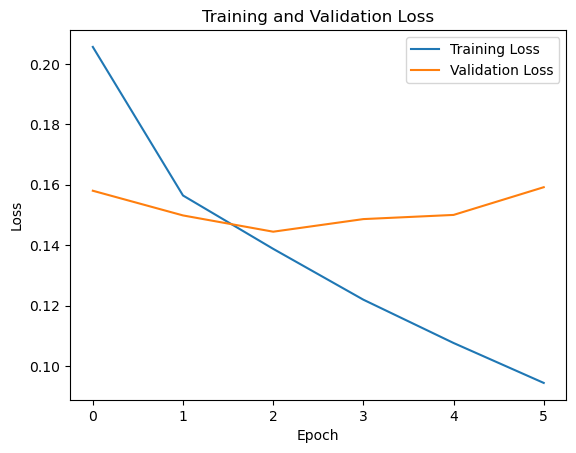

In [45]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

np.random.seed(42)
tf.random.set_seed(42)

model = MobileNetV2(pre_trained=True, frozen=False)

optimizer = Adam(learning_rate=0.0001, epsilon=1e-7)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# train the model
history = model.fit(x_train_img, y_train_one_hot, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# plot training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [46]:
from sklearn.metrics import classification_report

# predictions on test data
y_pred_probabilities = model.predict(x_test_img)
y_pred_classes = np.argmax(y_pred_probabilities, axis=1)

report = classification_report(y_test, y_pred_classes)
print(report)

48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step
              precision    recall  f1-score   support

           0       0.78      0.16      0.27        43
           1       0.53      0.56      0.54        93
           2       0.46      0.70      0.56       217
           3       1.00      0.11      0.20        44
           4       0.57      0.30      0.39       171
           5       0.87      0.91      0.89       908
           6       0.65      0.57      0.61        35

    accuracy                           0.73      1511
   macro avg       0.69      0.47      0.49      1511
weighted avg       0.75      0.73      0.72      1511



In [47]:
# check mappings
dx_to_dx_code = dict(zip(df['dx'], df['dx_code']))
for dx, dx_code in dx_to_dx_code.items():
    print(f"{dx}: {dx_code}")

bkl: 2
mel: 4
nv: 5
bcc: 1
akiec: 0
df: 3
vasc: 6


## 2-Model on image feature + metadata (only normalized)

In [48]:
class FeatureFusion(tf.keras.Model):
    def __init__(self, meta_features,num_classes = 7, pre_trained=False, frozen=False):
        super(FeatureFusion, self).__init__()

        self.meta_features = meta_features
        self.cnn = MobileNetV2FeatureExtractor(pre_trained=pre_trained, frozen=frozen)
        self.cnn.trainable = not frozen

        self.classifier = Sequential([
            layers.Dense(num_classes, activation='sigmoid')  # multi-class classification
        ])
        
        
    def call(self, inputs):
        im, meta = inputs
        x1 = self.cnn(im)

        # flatten x1
        x1 = layers.Flatten()(x1)

        # concatenate image and meta features
        x = layers.Concatenate()([x1, meta])

        # forward pass through the classifier
        x = self.classifier(x)

        return x

C:\Users\pc\AppData\Local\Temp\ipykernel_7380\1006374142.py:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  self.cnn = tf.keras.applications.MobileNetV2(weights='imagenet' if pre_trained else None, include_top=False)


Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 57s 165ms/step - accuracy: 0.6709 - loss: 0.2415 - val_accuracy: 0.7564 - val_loss: 0.1632
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 40s 160ms/step - accuracy: 0.7584 - loss: 0.1581 - val_accuracy: 0.7823 - val_loss: 0.1532
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 40s 160ms/step - accuracy: 0.7962 - loss: 0.1385 - val_accuracy: 0.7848 - val_loss: 0.1538
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 40s 158ms/step - accuracy: 0.8288 - loss: 0.1207 - val_accuracy: 0.7534 - val_loss: 0.1785
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 40s 160ms/step - accuracy: 0.8414 - loss: 0.1087 - val_accuracy: 0.7718 - val_loss: 0.1645


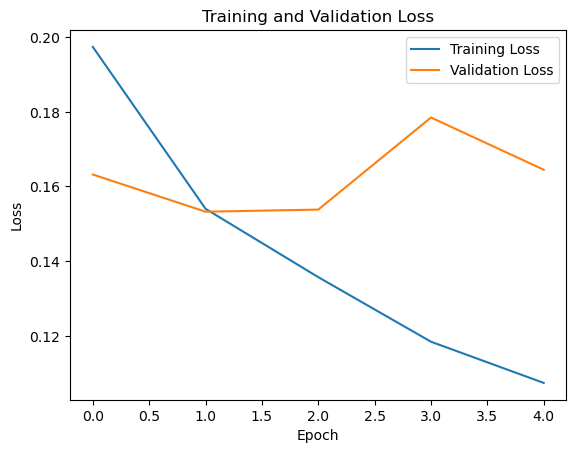

In [49]:
np.random.seed(42)
tf.random.set_seed(42)

# prepare input data 
train_data = (x_train_img, x_train_meta)
test_data = (x_test_img, x_test_meta)

model = FeatureFusion(meta_features=x_train_meta.shape[1], pre_trained=True, frozen=False)

optimizer = Adam(learning_rate=0.0001, epsilon=1e-7)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# train the model
history = model.fit(train_data, y_train_one_hot, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# plot training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [50]:
# predictions on test data
y_pred_probabilities = model.predict(test_data)
y_pred_classes = np.argmax(y_pred_probabilities, axis=1)

report = classification_report(y_test, y_pred_classes)
print(report)

48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step
              precision    recall  f1-score   support

           0       0.33      0.16      0.22        43
           1       0.44      0.55      0.49        93
           2       0.48      0.56      0.51       217
           3       0.00      0.00      0.00        44
           4       0.51      0.20      0.29       171
           5       0.82      0.93      0.87       908
           6       0.71      0.29      0.41        35

    accuracy                           0.71      1511
   macro avg       0.47      0.38      0.40      1511
weighted avg       0.67      0.71      0.68      1511



D:\Users\pc\anaconda3\envs\python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Users\pc\anaconda3\envs\python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Users\pc\anaconda3\envs\python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [51]:
# check mappings
dx_to_dx_code = dict(zip(df['dx'], df['dx_code']))
for dx, dx_code in dx_to_dx_code.items():
    print(f"{dx}: {dx_code}")

bkl: 2
mel: 4
nv: 5
bcc: 1
akiec: 0
df: 3
vasc: 6


# 3-Model on image feature + metadata feature(random forest)

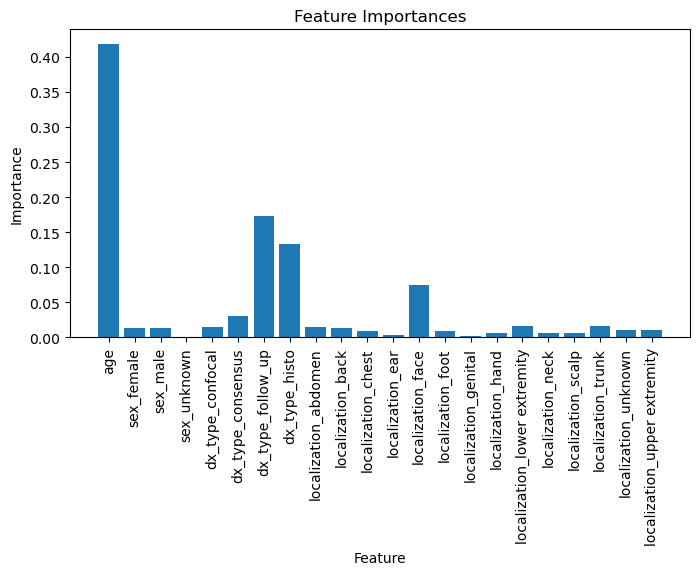

In [52]:
from sklearn.ensemble import RandomForestClassifier

# prepare data again
x_train_meta_2select= x_train_meta_encoded.copy()
x_test_meta_2select = x_test_meta_encoded.copy()

# random forest for feature selection
rf = RandomForestClassifier(n_estimators=100, random_state=23)
rf.fit(x_train_meta_2select, y_train)

# feature importances scores
feature_importances = rf.feature_importances_

feature_names = x_train_meta_2select.columns

# plot
plt.figure(figsize=(8, 4))
plt.bar(range(len(feature_importances)), feature_importances)
plt.xlabel('Feature') 
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(range(len(feature_importances)), feature_names, rotation=90)  # Set x-ticks to column names
plt.show()

In [53]:
# select the top 10 features
n = 4
top_n_indices = np.argsort(feature_importances)[::-1][:n]

x_train_meta_selected = x_train_meta_2select.iloc[:, top_n_indices]
x_test_meta_selected = x_test_meta_2select.iloc[:, top_n_indices]

In [54]:
# normalization
# convert DataFrame to numpy arrays
x_train_meta_values = x_train_meta_selected.values
x_test_meta_values = x_test_meta_selected.values

x_train_meta_mean = np.mean(x_train_meta_values)
x_test_meta_mean = np.mean(x_test_meta_values)

x_train_meta_std = np.std(x_train_meta_values)
x_test_meta_std = np.std(x_test_meta_values)

x_train_meta_rf = (x_train_meta_values - x_train_meta_mean) / x_train_meta_std
x_test_meta_rf = (x_test_meta_values - x_test_meta_mean) / x_test_meta_std

x_train_meta_rf[0]

array([ 0.29787712, -0.88434414,  1.48009838,  1.48009838])

C:\Users\pc\AppData\Local\Temp\ipykernel_7380\1006374142.py:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  self.cnn = tf.keras.applications.MobileNetV2(weights='imagenet' if pre_trained else None, include_top=False)


Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 67s 204ms/step - accuracy: 0.6763 - loss: 0.2462 - val_accuracy: 0.7639 - val_loss: 0.1586
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 50s 201ms/step - accuracy: 0.7683 - loss: 0.1558 - val_accuracy: 0.7873 - val_loss: 0.1468
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 50s 198ms/step - accuracy: 0.7985 - loss: 0.1352 - val_accuracy: 0.7858 - val_loss: 0.1475
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 49s 195ms/step - accuracy: 0.8202 - loss: 0.1190 - val_accuracy: 0.7953 - val_loss: 0.1432
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 49s 196ms/step - accuracy: 0.8374 - loss: 0.1096 - val_accuracy: 0.7933 - val_loss: 0.1515
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 49s 196ms/step - accuracy: 0.8649 - loss: 0.0956 - val_accuracy: 0.8058 - val_loss: 0.1517
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 50s 199ms/step - accuracy: 0.8762 - loss: 0.0882 - val_accuracy: 0.8033 - val_loss: 0.1534


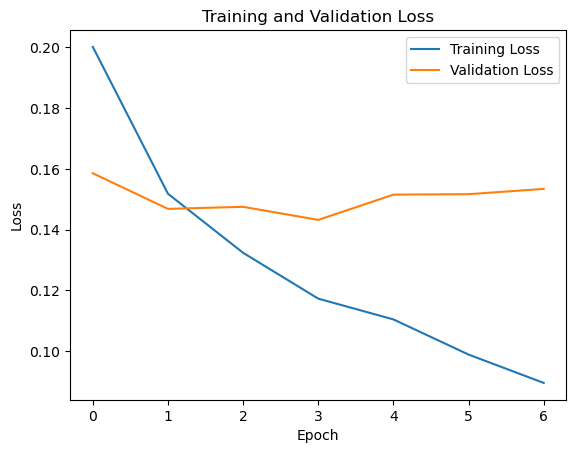

In [55]:
# train the classification model
np.random.seed(42)
tf.random.set_seed(42)

# prepare input data 
train_data = (x_train_img, x_train_meta_rf)
test_data = (x_test_img, x_test_meta_rf)

model = FeatureFusion(meta_features=x_train_meta_rf.shape[1], pre_trained=True, frozen=False)

optimizer = Adam(learning_rate=0.0001, epsilon=1e-7)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# train the model
history = model.fit(train_data, y_train_one_hot, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# plot training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [56]:
# predictions on test data
y_pred_probabilities = model.predict(test_data)
y_pred_classes = np.argmax(y_pred_probabilities, axis=1)

report = classification_report(y_test, y_pred_classes)
print(report)

48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step
              precision    recall  f1-score   support

           0       0.44      0.33      0.37        43
           1       0.45      0.75      0.57        93
           2       0.60      0.43      0.50       217
           3       0.62      0.41      0.49        44
           4       0.55      0.36      0.43       171
           5       0.83      0.93      0.88       908
           6       0.84      0.46      0.59        35

    accuracy                           0.74      1511
   macro avg       0.62      0.52      0.55      1511
weighted avg       0.73      0.74      0.72      1511



In [57]:
# check mappings
dx_to_dx_code = dict(zip(df['dx'], df['dx_code']))
for dx, dx_code in dx_to_dx_code.items():
    print(f"{dx}: {dx_code}")

bkl: 2
mel: 4
nv: 5
bcc: 1
akiec: 0
df: 3
vasc: 6


# 4-Model on image feature + metadata feature(PCA)

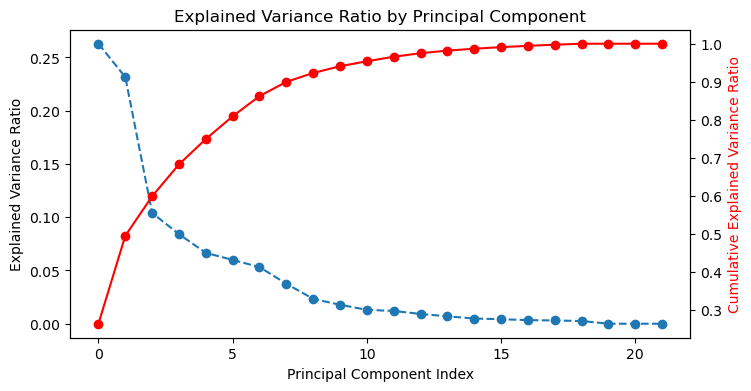

In [58]:
from sklearn.decomposition import PCA

# apply PCA 
pca = PCA()
pca.fit(x_train_meta)

# plot the explained variance ratio
plt.figure(figsize=(8, 4))
plt.plot(pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Explained Variance Ratio by Principal Component')
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')

# adding a secondary axis to show the cumulative explained variance ratio
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.twinx()  
plt.plot(cumulative_explained_variance, marker='o', linestyle='-', color='r')
plt.ylabel('Cumulative Explained Variance Ratio', color='r')
plt.grid(False) 

plt.show()

In [59]:
# select component
num_components = 8

# apply PCA again
pca = PCA(n_components=num_components)
pca.fit(x_train_meta)

# transform both training and test data separately using the fitted PCA
x_train_meta_pca = pca.transform(x_train_meta)
x_test_meta_pca = pca.transform(x_test_meta)

C:\Users\pc\AppData\Local\Temp\ipykernel_7380\1006374142.py:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  self.cnn = tf.keras.applications.MobileNetV2(weights='imagenet' if pre_trained else None, include_top=False)


Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 72s 223ms/step - accuracy: 0.6749 - loss: 0.2574 - val_accuracy: 0.7629 - val_loss: 0.1648
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 53s 211ms/step - accuracy: 0.7577 - loss: 0.1599 - val_accuracy: 0.7798 - val_loss: 0.1470
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 52s 208ms/step - accuracy: 0.7909 - loss: 0.1379 - val_accuracy: 0.7868 - val_loss: 0.1443
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 51s 204ms/step - accuracy: 0.8190 - loss: 0.1217 - val_accuracy: 0.7519 - val_loss: 0.1628
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 51s 204ms/step - accuracy: 0.8419 - loss: 0.1093 - val_accuracy: 0.7494 - val_loss: 0.1807
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 51s 205ms/step - accuracy: 0.8497 - loss: 0.1051 - val_accuracy: 0.7908 - val_loss: 0.1486


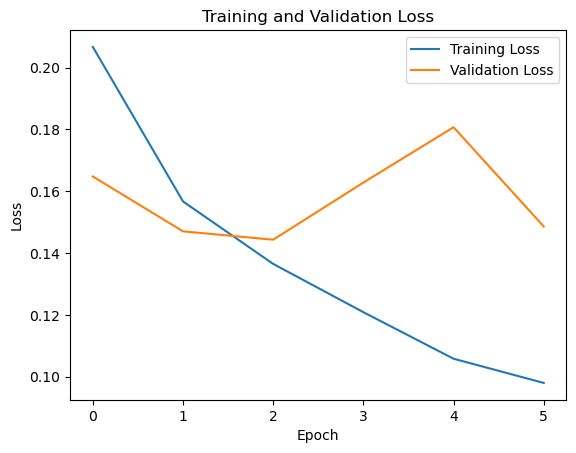

In [60]:
np.random.seed(42)
tf.random.set_seed(42)

# prepare input data 
train_data = (x_train_img, x_train_meta_pca)
test_data = (x_test_img, x_test_meta_pca)

model = FeatureFusion(meta_features=x_train_meta_pca.shape[1], pre_trained=True, frozen=False)

optimizer = Adam(learning_rate=0.0001, epsilon=1e-7)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# train the model
history = model.fit(train_data, y_train_one_hot, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# plot training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [61]:
# predictions on test data
y_pred_probabilities = model.predict(test_data)
y_pred_classes = np.argmax(y_pred_probabilities, axis=1)

report = classification_report(y_test, y_pred_classes)
print(report)

48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step
              precision    recall  f1-score   support

           0       0.52      0.26      0.34        43
           1       0.49      0.70      0.57        93
           2       0.54      0.57      0.55       217
           3       0.71      0.11      0.20        44
           4       0.64      0.36      0.46       171
           5       0.84      0.93      0.88       908
           6       0.81      0.49      0.61        35

    accuracy                           0.74      1511
   macro avg       0.65      0.49      0.52      1511
weighted avg       0.74      0.74      0.72      1511



In [62]:
# check mappings
dx_to_dx_code = dict(zip(df['dx'], df['dx_code']))
for dx, dx_code in dx_to_dx_code.items():
    print(f"{dx}: {dx_code}")

bkl: 2
mel: 4
nv: 5
bcc: 1
akiec: 0
df: 3
vasc: 6


# 5-model to merge image feature + metadata feature(ANN)

In [66]:
class FeatureFusion_ANN(tf.keras.Model):
    def __init__(self, meta_features, num_classes = 7, pre_trained=True, frozen=False):
        super(FeatureFusion_ANN, self).__init__()
    
        self.meta_features = meta_features

        self.cnn = MobileNetV2FeatureExtractor(pre_trained=pre_trained, frozen=frozen)
        self.cnn.trainable = not frozen

        #self.cnn_fc = tf.keras.Sequential([
            #layers.Dense(512, input_shape=(1280,), activation='relu')
        #])
        
        self.meta_nn = tf.keras.Sequential([
            layers.Dense(1024, activation='relu'),
            layers.Dense(512, activation='relu')
        ])

        self.classifier = tf.keras.Sequential([
            layers.Dense(num_classes, activation='sigmoid')  # multi-class classification
        ])
  
    def call(self, inputs):
        im, meta = inputs
        x1 = self.cnn(im)
        #x1 = self.cnn_fc(x1)
        x2 = self.meta_nn(meta)
        
        # flatten x1
        x1 = layers.Flatten()(x1)

        x = tf.concat([x1, x2], axis=-1)
        
        x = self.classifier(x)
        return x

C:\Users\pc\AppData\Local\Temp\ipykernel_7380\1006374142.py:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  self.cnn = tf.keras.applications.MobileNetV2(weights='imagenet' if pre_trained else None, include_top=False)


Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 74s 230ms/step - accuracy: 0.6835 - loss: 0.2367 - val_accuracy: 0.7619 - val_loss: 0.1541
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 53s 213ms/step - accuracy: 0.7775 - loss: 0.1449 - val_accuracy: 0.7853 - val_loss: 0.1418
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 53s 212ms/step - accuracy: 0.8071 - loss: 0.1258 - val_accuracy: 0.7848 - val_loss: 0.1354
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 54s 213ms/step - accuracy: 0.8229 - loss: 0.1129 - val_accuracy: 0.8143 - val_loss: 0.1298
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 54s 216ms/step - accuracy: 0.8549 - loss: 0.1015 - val_accuracy: 0.8023 - val_loss: 0.1370
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 55s 219ms/step - accuracy: 0.8706 - loss: 0.0885 - val_accuracy: 0.7758 - val_loss: 0.1632
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 55s 218ms/step - accuracy: 0.8798 - loss: 0.0835 - val_accuracy: 0.8093 - val_loss: 0.1476


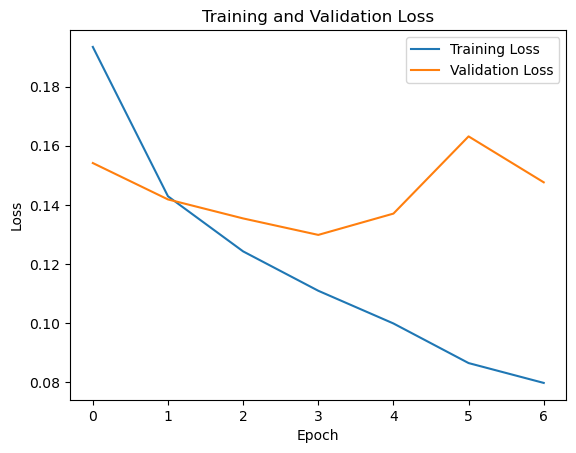

In [67]:
# train the classification model
np.random.seed(42)
tf.random.set_seed(42)

model = FeatureFusion_ANN(meta_features=x_train_meta.shape[1])

optimizer = Adam(learning_rate=0.0001, epsilon=1e-7)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
# train the model
history = model.fit(train_data, y_train_one_hot, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# plot training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [68]:
# predictions on test data
y_pred_probabilities = model.predict(test_data)
y_pred_classes = np.argmax(y_pred_probabilities, axis=1)

report = classification_report(y_test, y_pred_classes)
print(report)

48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step
              precision    recall  f1-score   support

           0       0.56      0.21      0.31        43
           1       0.54      0.62      0.58        93
           2       0.60      0.55      0.58       217
           3       0.69      0.45      0.55        44
           4       0.51      0.51      0.51       171
           5       0.86      0.92      0.89       908
           6       0.80      0.46      0.58        35

    accuracy                           0.76      1511
   macro avg       0.65      0.53      0.57      1511
weighted avg       0.75      0.76      0.75      1511



In [69]:
# check mappings
dx_to_dx_code = dict(zip(df['dx'], df['dx_code']))
for dx, dx_code in dx_to_dx_code.items():
    print(f"{dx}: {dx_code}")

bkl: 2
mel: 4
nv: 5
bcc: 1
akiec: 0
df: 3
vasc: 6
